COM526P Analytics and Systems of Big Data Practice




---

**Submitted By:** Prateek Agrawal
                  CED18I040







### Dataset Name: ICC World Cup 2007 Dataset

# **Analytics and Systems of Big Data Lab End Semester Examination**

Question: For the Given dataset, apply apt data pre-processing techniques  to clean the data for further processing. Exploit the concepts discussed in  Descriptive Statistics that relate to the data set to gain key insights from the data. Adopt a through exploratory data analytics approach,  relating the various concepts and plots discussed in the course / tested in the lab assignments to gain key insights from the given data set. On the 
Pre-processing and EDA front adopt an exhaustive approach relating the maximum no of techniques / features under each set. Over the cleaned data  set, apply the following algorithms.

-   Algorithm 1: FP-growth
-   Algorithm 2: Naive Bayes Classification or Regression
-   Algorithm 3: k-means Clustering

Dataset Name: ICC World Cup 2007 Dataset

Dataset Link: 
https://www.kaggle.com/willcanniford/icc-cricket-world-cup-2019-top-50-run-scorers

General Instruction: You shall apply necessary pre-processing techniques like discretization, binning etc to make the dataset suitable for applying FIM algorithm. You may also make any valid assumptions required for the  entire exercise and state them explicitly in your documents submitted.  Submit a complete report describing the techniques employed, code snippets and corresponding output as done for your lab submissions or share the  corresponding notebook link with all data present in the file do mention  the dataset name in your answer script.

: Based on the type of the assigned dataset, you shall either consider the 
entire set of features (or) subset of features to generate frequent 
patterns and apply predictive analytics.

Packages used : 

-   Numpy
-   Pandas
-   Matplotlib
-   Seaborn
-   Plotly
-   Scikit-learn
-   mlxtend
-   missingno
-   tqdm


Note : Most of the plots in the notebook are interative through clicking, hovering for better EDA.

In [1]:
#Importing the dependencies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os

# Imports for visualisations and displaying tables
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
import plotly
import plotly.express as px
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot,download_plotlyjs,init_notebook_mode

from sklearn.cluster import KMeans
from sklearn import preprocessing 

init_notebook_mode(connected=True)
%matplotlib inline

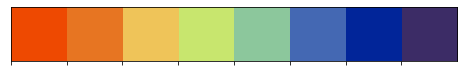

In [2]:
# Global Variables
my_colors = ["#EE4901", "#E77522", "#EFC459", "#C8E66E", "#8CC79C", "#4468B3", "#012599", "#3C2C66"]
sns.palplot(sns.color_palette(my_colors))

In [3]:
df_2007 = pd.read_csv('world_cup_2007_batting_raw.csv')
df_2011 = pd.read_csv('world_cup_2011_batting_raw.csv')
df_2015 = pd.read_csv('world_cup_2015_batting_raw.csv')
df_2019 = pd.read_csv('world_cup_2019_batting_raw.csv')

#### Uncomment and Run the cell below if you have an internet connection

In [4]:
# df_2007 = pd.read_csv('https://raw.githubusercontent.com/prateekagrawaliiit/ICC-Cricket-World-Cups/master/world_cup_2007_batting_raw.csv')
# df_2011 = pd.read_csv('https://raw.githubusercontent.com/prateekagrawaliiit/ICC-Cricket-World-Cups/master/world_cup_2011_batting_raw.csv')
# df_2015 = pd.read_csv('https://raw.githubusercontent.com/prateekagrawaliiit/ICC-Cricket-World-Cups/master/world_cup_2015_batting_raw.csv')
# df_2019 = pd.read_csv('https://raw.githubusercontent.com/prateekagrawaliiit/ICC-Cricket-World-Cups/master/world_cup_2019_batting_raw.csv')

In [5]:
df_2007['Year'] = 2007
df_2011['Year'] = 2011
df_2015['Year'] = 2015
df_2019['Year'] = 2019

In [6]:
df_2007.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year
0,ML Hayden (AUS),11,10,1,659,158,73.22,652,101.07,3,1,0,69,18,2007
1,DPMD Jayawardene (SL),11,11,2,548,115*,60.88,644,85.09,1,4,0,40,10,2007
2,RT Ponting (AUS),11,9,1,539,113,67.37,565,95.39,1,4,0,53,11,2007
3,SB Styris (NZ),10,9,3,499,111*,83.16,598,83.44,1,4,0,45,6,2007
4,JH Kallis (SA),10,9,3,485,128*,80.83,578,83.91,1,3,0,43,7,2007


In [7]:
df_2011.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year
0,TM Dilshan (SL),9,9,1,500,144,62.50,551,90.74,2,2,0,61,4,2011
1,SR Tendulkar (INDIA),9,9,0,482,120,53.55,524,91.98,2,2,0,52,8,2011
2,KC Sangakkara (SL),9,8,3,465,111,93.00,555,83.78,1,3,0,44,5,2011
3,IJL Trott (ENG),7,7,0,422,92,60.28,522,80.84,0,5,0,28,0,2011
4,WU Tharanga (SL),9,9,2,395,133,56.42,472,83.68,2,1,0,52,2,2011


In [8]:
df_2015.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year
0,MJ Guptill (NZ),9,9,1,547,237*,68.37,523,104.58,2,1,0,59,16,2015
1,KC Sangakkara (SL),7,7,2,541,124,108.20,511,105.87,4,0,0,57,7,2015
2,AB de Villiers (SA),8,7,2,482,162*,96.40,334,144.31,1,3,0,43,21,2015
3,BRM Taylor (ZIM),6,6,0,433,138,72.16,405,106.91,2,1,0,43,12,2015
4,S Dhawan (INDIA),8,8,0,412,137,51.50,449,91.75,2,1,0,48,9,2015


In [9]:
df_2019.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year
0,RG Sharma (INDIA),9,9,1,648,140,81.00,659,98.33,5,1,0,67,14,2019
1,DA Warner (AUS),10,10,1,647,166,71.88,724,89.36,3,3,0,66,8,2019
2,Shakib Al Hasan (BDESH),8,8,1,606,124*,86.57,631,96.03,2,5,0,60,2,2019
3,KS Williamson (NZ),10,9,2,578,148,82.57,771,74.96,2,2,0,50,3,2019
4,JE Root (ENG),11,11,2,556,107,61.77,621,89.53,2,3,0,48,2,2019


In [10]:
df = df_2007.append([df_2011,df_2015,df_2019])
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year
0,ML Hayden (AUS),11,10,1,659,158,73.22,652,101.07,3,1,0,69,18,2007
1,DPMD Jayawardene (SL),11,11,2,548,115*,60.88,644,85.09,1,4,0,40,10,2007
2,RT Ponting (AUS),11,9,1,539,113,67.37,565,95.39,1,4,0,53,11,2007
3,SB Styris (NZ),10,9,3,499,111*,83.16,598,83.44,1,4,0,45,6,2007
4,JH Kallis (SA),10,9,3,485,128*,80.83,578,83.91,1,3,0,43,7,2007


### PRE - PROCESSING

In [11]:
# Utilities Function to 

    # -    Extract the Country of the player
    # -    Clean the player name i.e Remove Country 
    # -    Whether the player was *Not Out* on his High Score
    # -    Clean the High Score column of "*"

def extract_country(player_string):
    regex = re.compile(r'.* \(([A-Z]*)\)')
    return(regex.search(player_string).group(1))

def clean_player_name(player_string):
    regex = re.compile(r'([a-zA-Z \-]*)\s\([A-Z]*\)')
    return(regex.search(player_string).group(1))

def is_not_out_while_high_score(HS):
    if "*" in str(HS):
        return 1
    else:
        return 0
def clean_high_score(HS):
    if "*" in str(HS):
        x = str(HS).split('*')[0]
        return x
    else:
        return HS

In [12]:
df['Country'] = df['Player'].apply(lambda x : extract_country(x))
df['Player'] = df['Player'].apply(lambda x : clean_player_name(x))
df['Not_out_HS'] = df['HS'].apply(lambda x : is_not_out_while_high_score(x))
df['HS'] = df['HS'].apply(lambda x : clean_high_score(x))
df = df.astype({"HS":'int64','Year':'object','Not_out_HS':'object'})
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year,Country,Not_out_HS
0,ML Hayden,11,10,1,659,158,73.22,652,101.07,3,1,0,69,18,2007,AUS,0
1,DPMD Jayawardene,11,11,2,548,115,60.88,644,85.09,1,4,0,40,10,2007,SL,1
2,RT Ponting,11,9,1,539,113,67.37,565,95.39,1,4,0,53,11,2007,AUS,0
3,SB Styris,10,9,3,499,111,83.16,598,83.44,1,4,0,45,6,2007,NZ,1
4,JH Kallis,10,9,3,485,128,80.83,578,83.91,1,3,0,43,7,2007,SA,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 49
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      199 non-null    object 
 1   Mat         199 non-null    int64  
 2   Inns        199 non-null    int64  
 3   NO          199 non-null    int64  
 4   Runs        199 non-null    int64  
 5   HS          199 non-null    int64  
 6   Ave         199 non-null    float64
 7   BF          199 non-null    int64  
 8   SR          199 non-null    float64
 9   100         199 non-null    int64  
 10  50          199 non-null    int64  
 11  0           199 non-null    int64  
 12  4s          199 non-null    int64  
 13  6s          199 non-null    int64  
 14  Year        199 non-null    object 
 15  Country     199 non-null    object 
 16  Not_out_HS  199 non-null    object 
dtypes: float64(2), int64(11), object(4)
memory usage: 28.0+ KB


<AxesSubplot:>

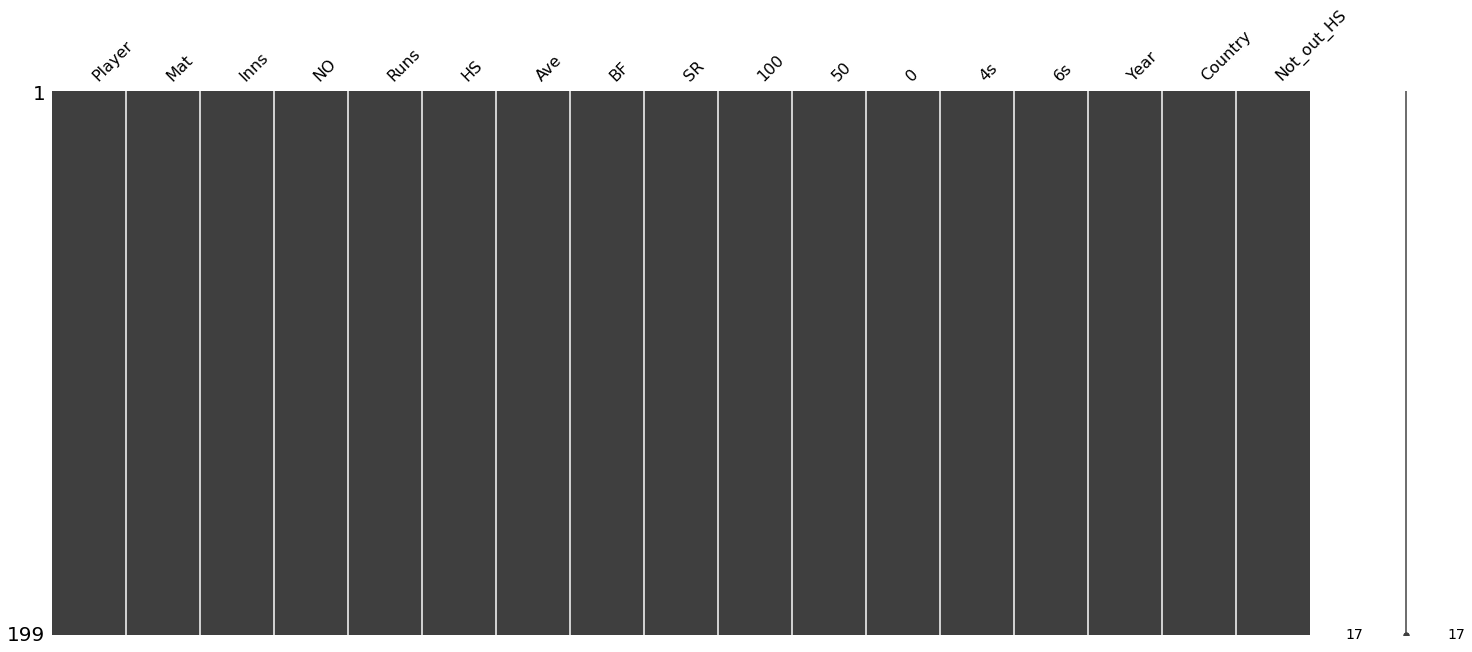

In [14]:
import missingno as msno
msno.matrix(df)

#### Inference : 

- Most of the columns in the dataset are numerical in nature with Year,Country,Player being the categorical columns.
- The data is very clean has no null or missing values as verified by the plot above.

### EDA (Exploratory Data Analysis)

####   Univariate Analysis

In [15]:
# We use the describe function to print most of the statistical properties of the columns

df.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,7.909548,7.447236,0.924623,288.160804,94.572864,46.026332,329.819095,89.810955,0.527638,1.763819,0.341709,27.381910,5.035176
std,1.772933,1.719167,1.009724,115.470204,33.387584,18.358980,126.911714,21.278202,0.809034,1.197429,0.614488,13.037044,4.447649
min,3.000000,2.000000,0.000000,129.000000,30.000000,19.110000,85.000000,45.380000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,7.000000,6.000000,0.000000,198.500000,72.000000,33.835000,243.500000,76.730000,0.000000,1.000000,0.000000,18.500000,2.000000
50%,8.000000,8.000000,1.000000,253.000000,89.000000,41.600000,310.000000,87.770000,0.000000,2.000000,0.000000,24.000000,4.000000
75%,9.000000,9.000000,1.000000,350.000000,111.500000,54.330000,402.500000,99.740000,1.000000,2.000000,1.000000,33.000000,7.000000
max,11.000000,11.000000,5.000000,659.000000,237.000000,145.000000,771.000000,188.500000,5.000000,5.000000,4.000000,69.000000,26.000000


In [16]:
# We filter out the numerical and categorical columns

categorical_columns = ['Year','Country','Player','Not_out_HS']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

In [17]:
num_df = df[numerical_columns]
num_df.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,11,10,1,659,158,73.22,652,101.07,3,1,0,69,18
1,11,11,2,548,115,60.88,644,85.09,1,4,0,40,10
2,11,9,1,539,113,67.37,565,95.39,1,4,0,53,11
3,10,9,3,499,111,83.16,598,83.44,1,4,0,45,6
4,10,9,3,485,128,80.83,578,83.91,1,3,0,43,7


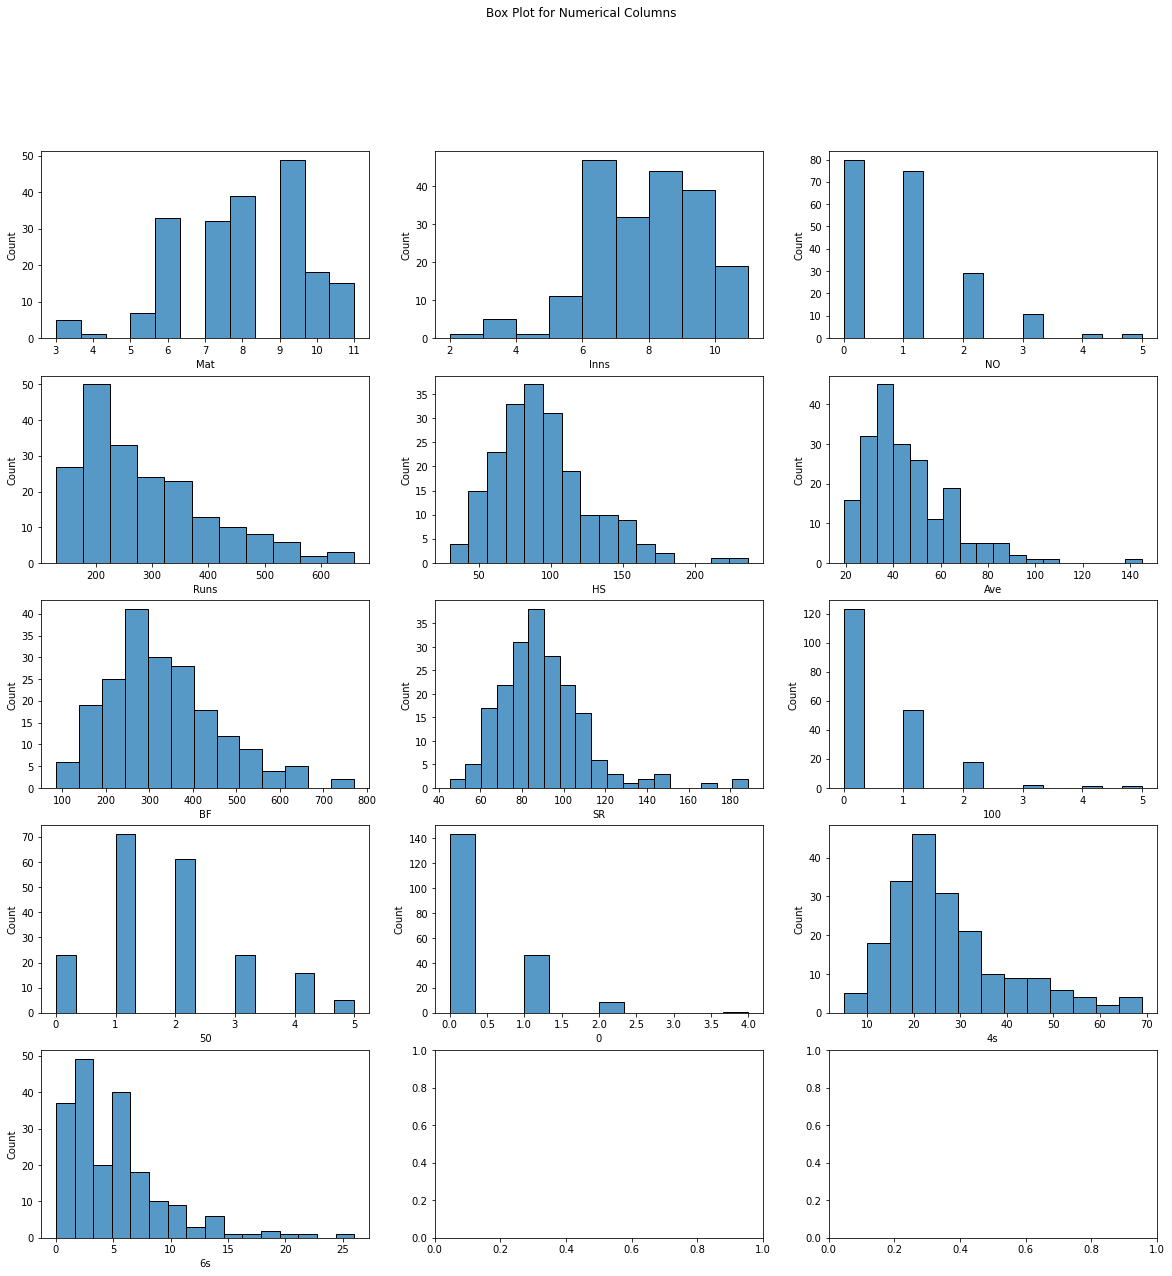

In [18]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
fig.suptitle('Box Plot for Numerical Columns')
for i in range(len(num_df.columns)):
    row = int(i/3)
    col = int(i%3)
    sns.histplot(df[num_df.columns[i]],ax=axes[row,col])

### Inference : 

-   The columns Mat,Inn,SR,Runs,BF, HS, 100s, Ave all follow a normal distribution curve with some skewness
-   Number of 50s, 0s, 6s,4s are discretized continuous columns

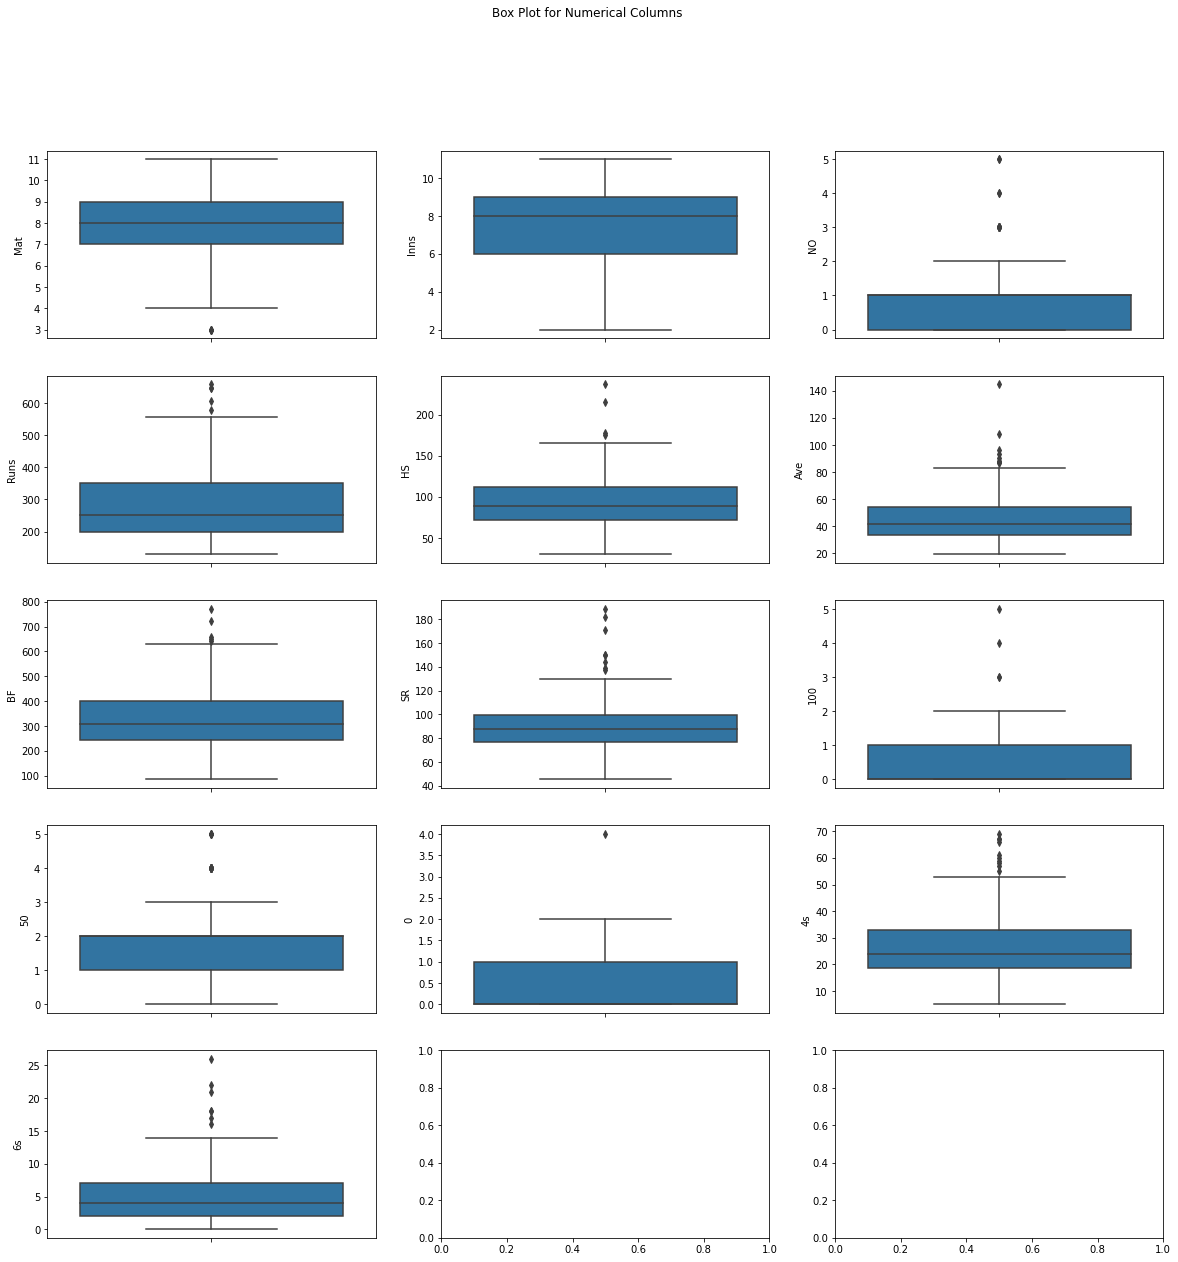

In [19]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
fig.suptitle('Box Plot for Numerical Columns')
for i in range(len(num_df.columns)):
    row = int(i/3)
    col = int(i%3)
    sns.boxplot(ax=axes[row,col],data=df,y=num_df.columns[i])

#### Inference :

- Most the counties have some outliers 
- Mat and Innings do not have any outlier

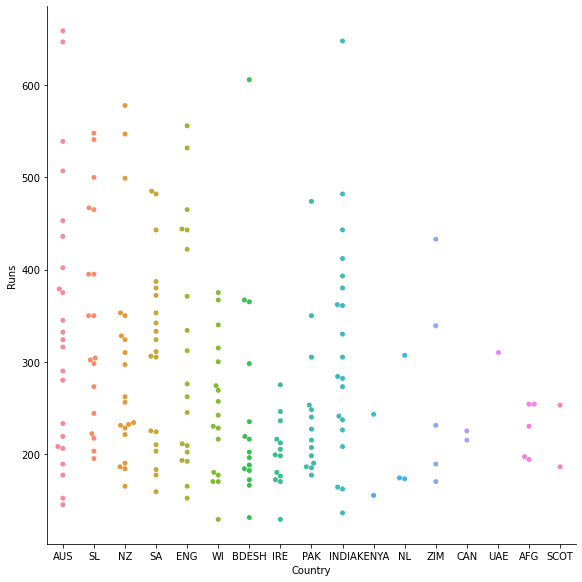

In [20]:
sns.catplot(x="Country", y="Runs", data=df,kind="swarm",height=8, aspect=1)

#### Inference :

The highest scoring nations are Australia, South Africe, India, Bangladesh, England, West Indies, Sri Lanka, New Zealand

The other half of the counties Ireland, Kenya, Netherlands, Zimbabwe, Canada, UAE, Afghanistan and Scotland have relatively less high scores.

# Multivariate Analysis

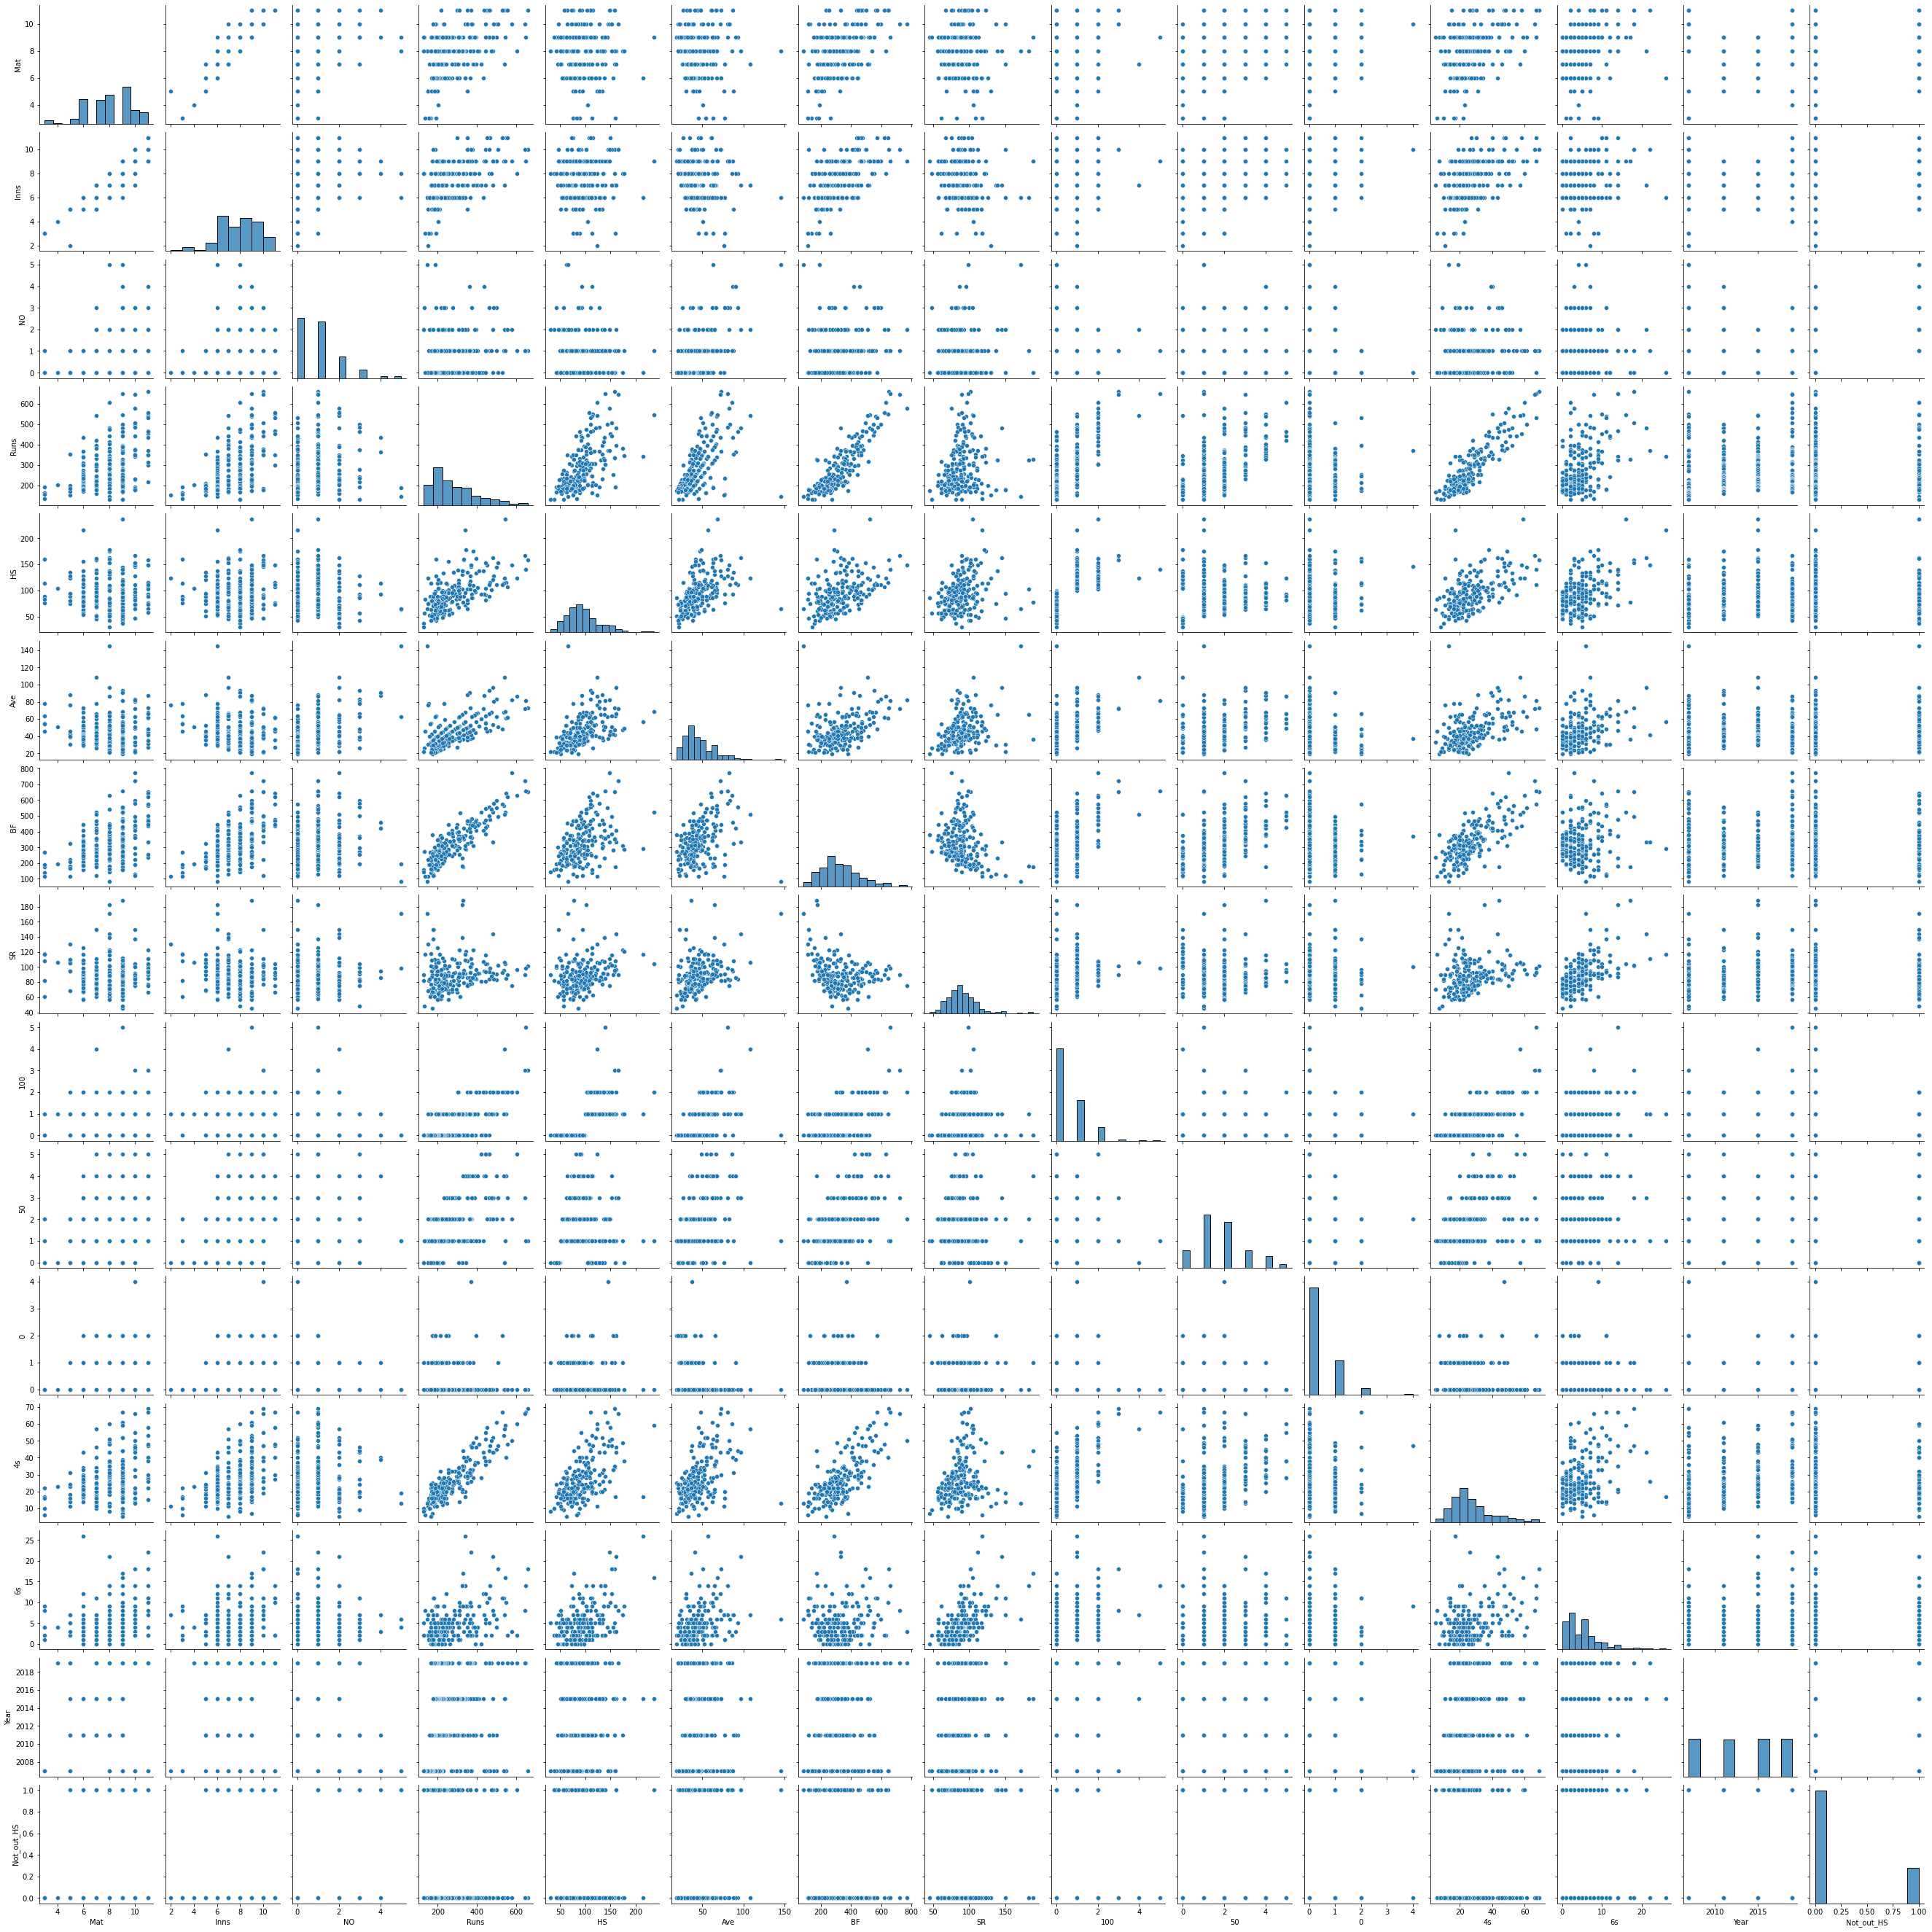

In [21]:
sns.pairplot(df)

In [22]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Average',
                                 values=df['Ave']),
                            dict(label='Matches',
                                 values=df['Mat']),
                            dict(label='Runs',
                                 values=df['Runs']),
                            dict(label='Balls Faced',
                                 values=df['BF'])],
                showupperhalf=False, # remove plots on diagonal
                text=df['Player'],
                marker=dict(
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))
fig.update_layout(
    title='Relationship between Average - Matches - Runs - Balls Faced',
    width=600,
    height=600,
)
fig.show()

#### Inference :

- There exists a linear relationship between the average and runs.
- There exists a linear relationship between average and balls faced.
- There is a strong linear relationship between runs and balls faced.

The above observations are also true since average = runs/innings and since innings and matches are highly correlated this eachother.

One interesting observation is that more the number of runs is linear to number of balls. This is not a confirmed relationship since there might be players who are power hitter i.e score more boundaries in less balls and then there are players that play safe and play a lot of balls


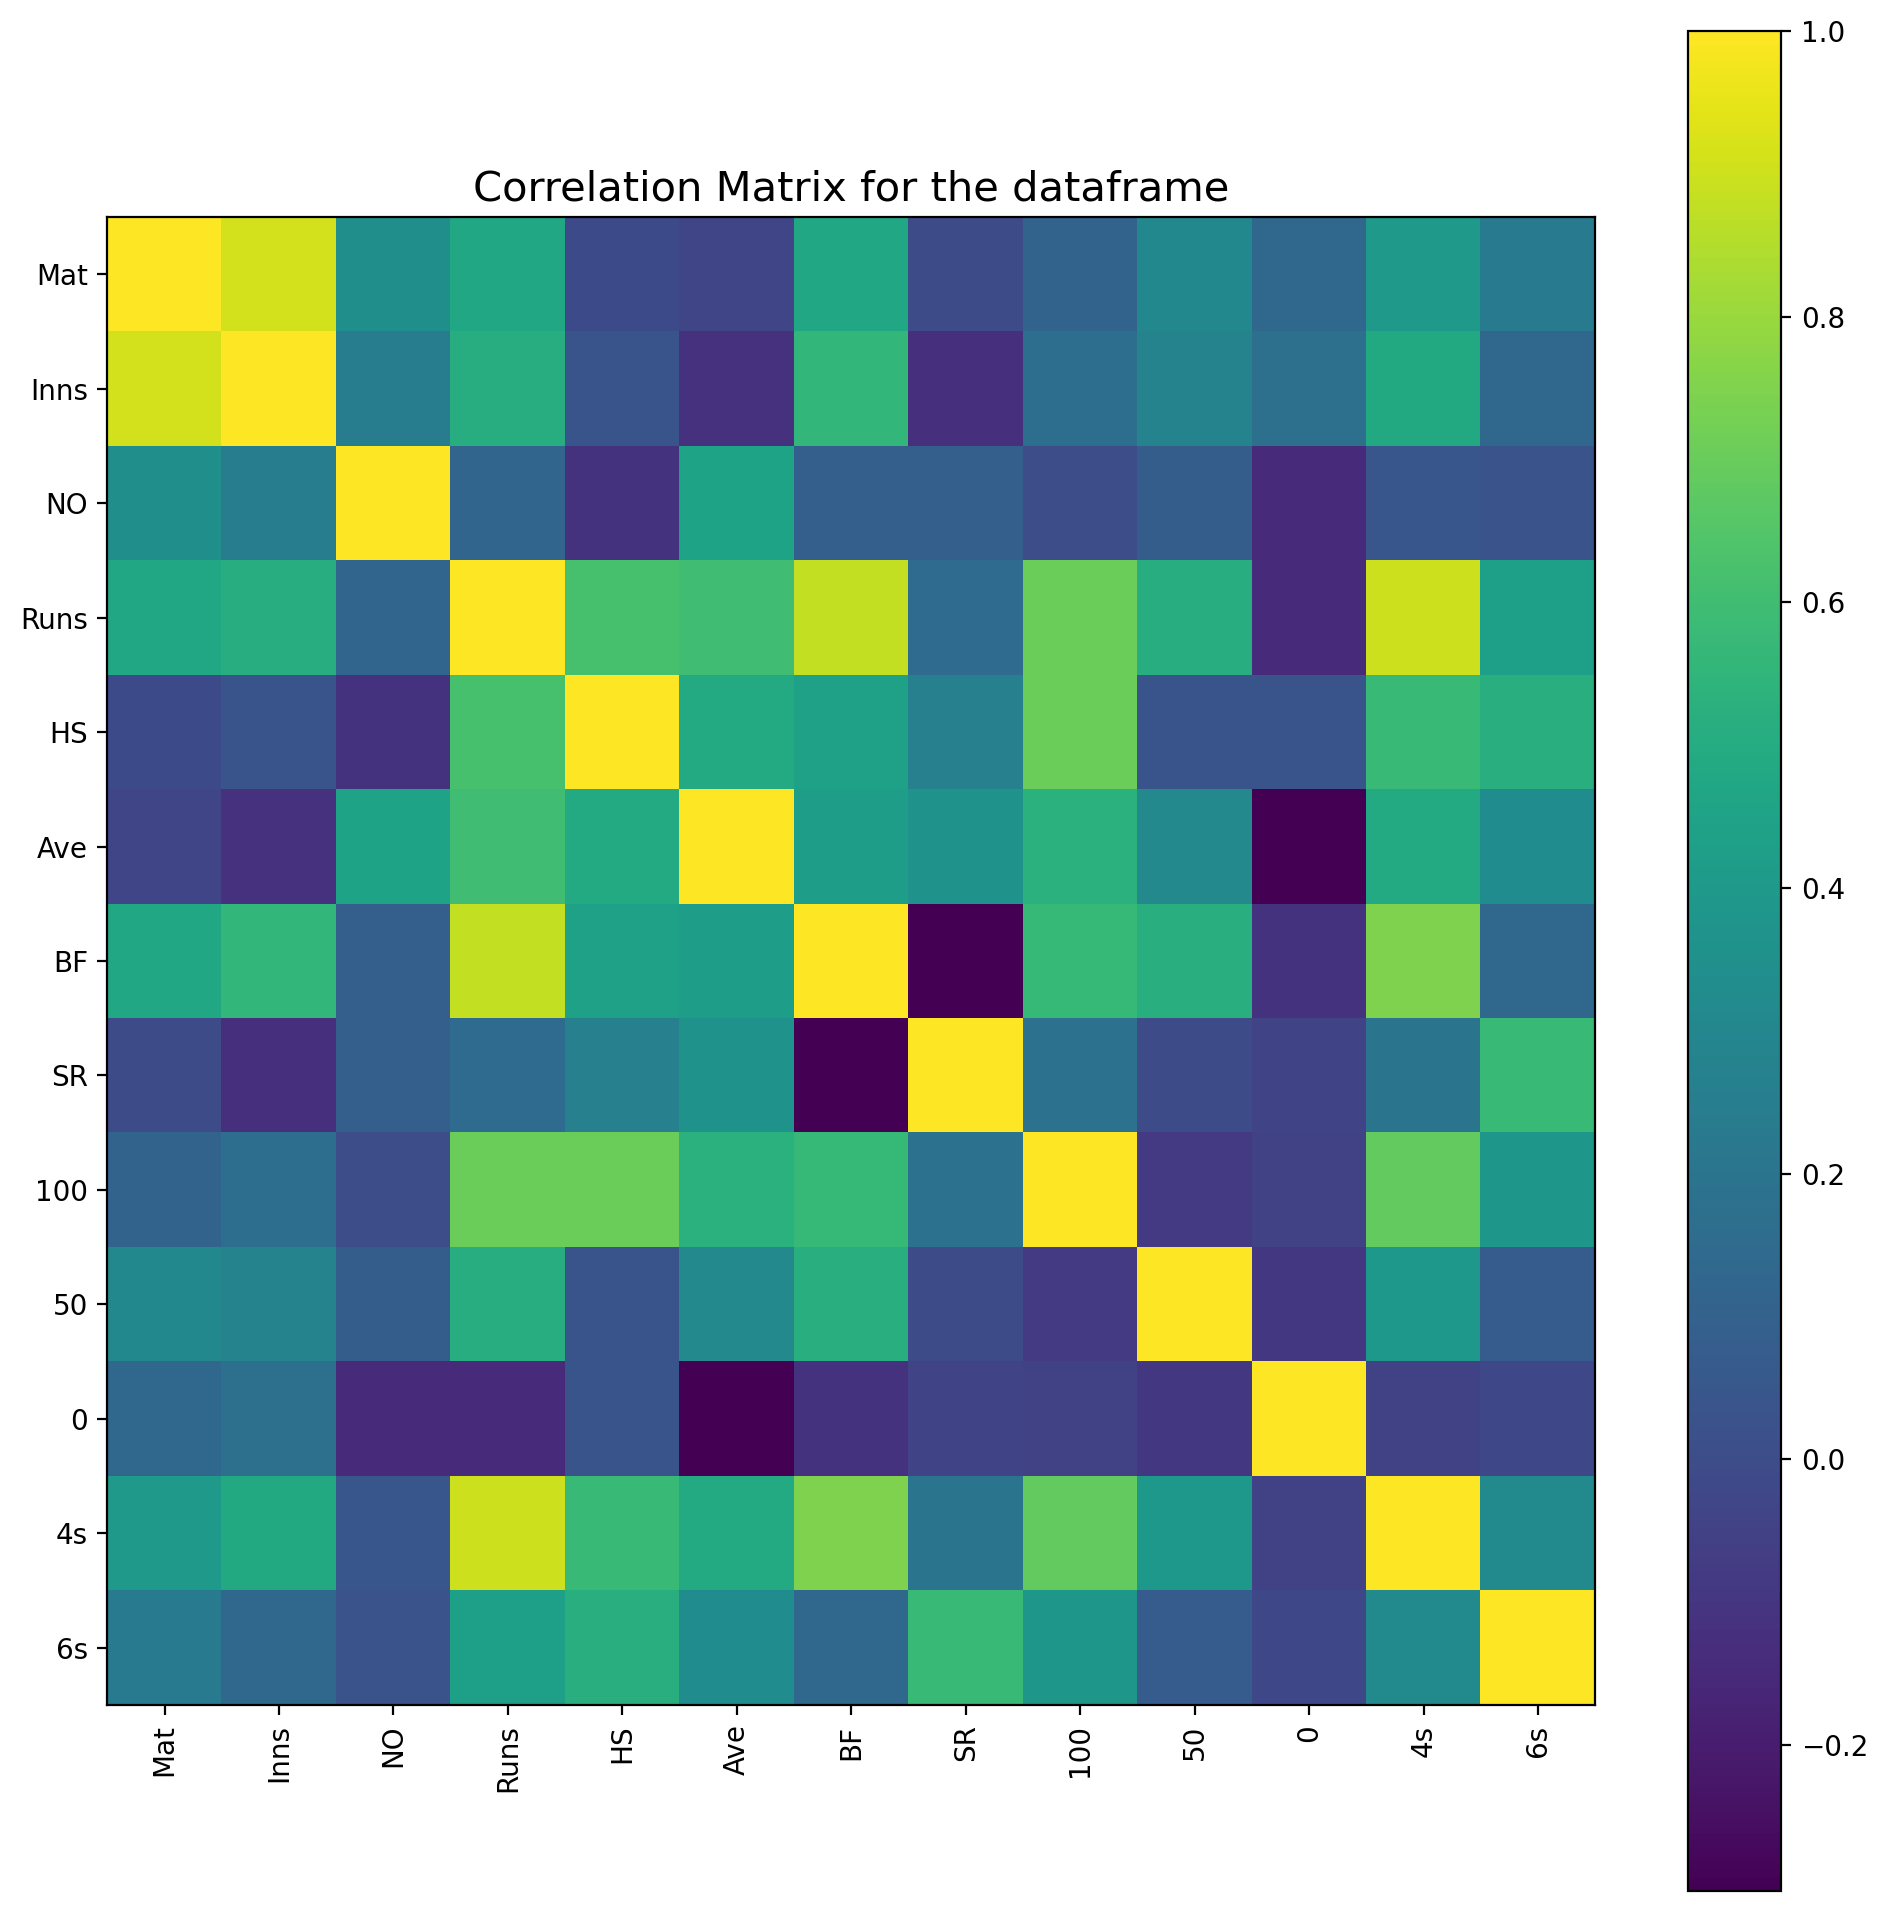

In [23]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=200, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for the dataframe', fontsize=15)
    plt.show()
plotCorrelationMatrix(df, 12)

#### Inference :

- The relationship between runs and balls faced can be verified from the correlation matrix
- The runs scored is highly correlated with the number of 4s as well
- There exists slight correlation between the number of 4s and hundreds.

<AxesSubplot:xlabel='BF', ylabel='Runs'>

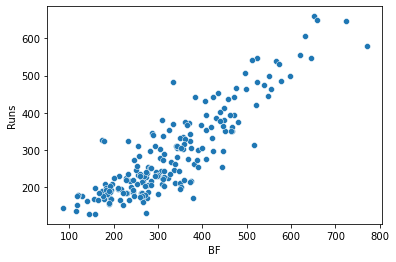

In [24]:
# Scatter plot to visualize the relationship better

sns.scatterplot(data=df[numerical_columns],x="BF",y="Runs")

<AxesSubplot:xlabel='Ave', ylabel='Runs'>

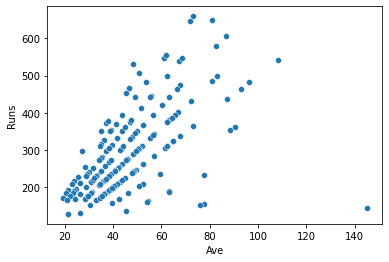

In [25]:
sns.scatterplot(data=df[numerical_columns],x="Ave",y="Runs")

#### There seems to be some kind of a linear relationship between Runs and Average as well but is it not too strong

#### Year based Analysis

In [26]:
year_grouped = df.groupby(['Year','Country'])['Runs'].mean()
# sns.scatterplot(data=year_grouped,x=year_grouped.index,y=year_grouped.values)

fig = px.line(year_grouped, x=[x[0] for x in year_grouped.index], y=year_grouped.values,color=[x[1] for x in year_grouped.index], title='Average Runs per country per year', markers=True)
fig.update_traces(textposition="bottom right")
fig.show()

#### Inference :

- The performance of Sri Lanka has been decreasing for the last two world cup seasons.
- Pakistan has a steady upwards trajectory over the last 4 world cup seasons
- New Zealand has maintained a similar performance across the last 4 world cups.
- Australia has been struggling in the 2011 and 2015 season but did very well in the 2019 season.
- India performed its best in 2011 (when it won the world cup) but the performance took a hit but it is improving since the last season

In [27]:
year_grouped = df.groupby(['Year','Country'])['100'].sum()
# sns.scatterplot(data=year_grouped,x=year_grouped.index,y=year_grouped.values)

fig = px.line(year_grouped, x=[x[0] for x in year_grouped.index], y=year_grouped.values,color=[x[1] for x in year_grouped.index], title='Number of Hundreds per country per year', markers=True)
fig.update_traces(textposition="bottom right")
fig.show()

In [28]:
year_grouped = df.groupby(['Year','Country'])['SR'].mean()
# sns.scatterplot(data=year_grouped,x=year_grouped.index,y=year_grouped.values)

fig = px.line(year_grouped, x=[x[0] for x in year_grouped.index], y=year_grouped.values,color=[x[1] for x in year_grouped.index], title='Average Strike Rate per country per year', markers=True)
fig.update_traces(textposition="bottom right")
fig.show()

#### Inference : 

-   The Strike Rate of West Indian players is decreasing.
-   The SR of Pakistan and Ireland seems to be improving from 2019
-   The SR of Bangladeshhas been improving since 2007
-   India has maintaned almost the same strike rate over the last 4 seasons


In [29]:
year_grouped = df.groupby(['Year','Country'])['6s'].sum()
# sns.scatterplot(data=year_grouped,x=year_grouped.index,y=year_grouped.values)

fig = px.line(year_grouped, x=[x[0] for x in year_grouped.index], y=year_grouped.values,color=[x[1] for x in year_grouped.index], title='Number of 6s per country per year', markers=True)
fig.update_traces(textposition="bottom right")
fig.show()

In [30]:
year_grouped = df.groupby(['Year','Country'])['4s'].sum()
# sns.scatterplot(data=year_grouped,x=year_grouped.index,y=year_grouped.values)

fig = px.line(year_grouped, x=[x[0] for x in year_grouped.index], y=year_grouped.values,color=[x[1] for x in year_grouped.index], title='Number of 4s per country per year', markers=True)
fig.update_traces(textposition="bottom right")
fig.show()

#### Hierarichal Analysis

The parameters of a player can be best viewed as an hierarchy between Year -> Country -> Player
We are using a plot called Zoomable Sunburst where the each layer represents a hierarchy

In [31]:
# Please click on the sub divisons to enlarge them. The graph is an interactive graph.

fig = px.sunburst(df, path=['Year', 'Country', 'Player'], values='HS',title="Click on the 2015 to see details related to 2015. Click in the centre to go back")
fig.show()

In [32]:
fig = px.sunburst(df, path=['Year', 'Country', 'Player'], values='SR',title="Click on the 2015 to see details related to 2015. Click in the centre to go back")
fig.show()

In [33]:
fig = px.sunburst(df, path=['Year', 'Country', 'Player'], values='Ave',title="Click on the 2015 to see details related to 2015. Click in the centre to go back")
fig.show()

In [34]:
country_counts = df.groupby('Country')['Player'].count()
country_counts_df = pd.DataFrame()
country_counts_df['Counts'] =country_counts.values 
country_counts_df['Country'] = ['Afghanistan','Australia','Bangladesh','Canada','England','India','Ireland','Kenya','New Zealand','Netherlands','Pakistan','South Africa','Scotland','Sri Lanka','United Arab Emirates','West Indies','Zimbabwe']

data = dict(type = 'choropleth',
            locations = country_counts_df['Country'],
            locationmode = 'country names',
            autocolorscale = True,
            colorscale = 'RdBu',
            text= country_counts.index,
            z=country_counts_df['Counts'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':'Colorbar Title','len':1,'lenmode':'fraction'})

layout = dict(geo = dict(scope='world'))
#Initializing the object for graph_objs.Figure class
world_map = go.Figure(data = [data],layout = layout)
#plotting the map
iplot(world_map)

#### Inference:

-   Australia has the highest number of players that have been in top 50 in the last 4 seasons.
-   India has the second highest number of players that have been in top 50 in the last 4 seasons.

## FP-Growth

### Processing for FP-Growth Algorithm

Since most of the columns are numerical we will be converting them into categories using binning and then use them for frequent item set mining and association rules

For the following dataset we only have 199 records and thus we have used binary binning i.e divided the column into two halves using the median.

For larger datasets we can split the data into mutiple chunks

In [35]:
df_new = df.copy()
df_new.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year,Country,Not_out_HS
0,ML Hayden,11,10,1,659,158,73.22,652,101.07,3,1,0,69,18,2007,AUS,0
1,DPMD Jayawardene,11,11,2,548,115,60.88,644,85.09,1,4,0,40,10,2007,SL,1
2,RT Ponting,11,9,1,539,113,67.37,565,95.39,1,4,0,53,11,2007,AUS,0
3,SB Styris,10,9,3,499,111,83.16,598,83.44,1,4,0,45,6,2007,NZ,1
4,JH Kallis,10,9,3,485,128,80.83,578,83.91,1,3,0,43,7,2007,SA,1


In [36]:
df_new['BoundaryRuns'] = df_new['4s'] * 4 + df_new['6s'] * 6
df_new['NonBoundaryRuns'] = df_new['Runs'] - df_new['BoundaryRuns']
df_new['TotalBoundaries'] = df_new['4s'] + df_new['6s']
df_new['NonBoundaryBalls'] = df_new['BF'] - df_new['TotalBoundaries']
df_new['RunsFromBoundary %'] = round(df_new['BoundaryRuns'] / df_new['Runs'] * 100, 2)
df_new['Boundary %'] = round(df_new['TotalBoundaries'] / df_new['BF'] * 100, 2)
df_new['NonBoundaryStrikeRate'] = round(df_new['NonBoundaryRuns'] / df_new['NonBoundaryBalls'] * 100, 2)

In [37]:
df_new.drop(['Player','Year',],axis=1,inplace=True)

In [38]:
columns_to_be_binned = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       '4s', '6s', 'Not_out_HS', 'BoundaryRuns', 'NonBoundaryRuns',
       'TotalBoundaries', 'NonBoundaryBalls', 'RunsFromBoundary %',
       'Boundary %', 'NonBoundaryStrikeRate']

In [39]:
for col in columns_to_be_binned:
    med = np.median(df_new[col])
    df_new[col] = df_new[col].apply(lambda x : 1 if x > med else 0)

In [40]:
df_new.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,6s,Country,Not_out_HS,BoundaryRuns,NonBoundaryRuns,TotalBoundaries,NonBoundaryBalls,RunsFromBoundary %,Boundary %,NonBoundaryStrikeRate
0,1,1,0,1,1,1,1,1,1,0,...,1,AUS,0,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,0,1,1,...,1,SL,1,1,1,1,1,0,0,1
2,1,1,0,1,1,1,1,1,1,1,...,1,AUS,0,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,0,1,1,...,1,NZ,1,1,1,1,1,0,0,1
4,1,1,1,1,1,1,1,0,1,1,...,1,SA,1,1,1,1,1,0,0,1


In [41]:
for col in columns_to_be_binned:
    df_new[col] = df_new[col].apply(lambda x : "High_" + str(col) if x == 1 else "Low_" + str(col))

In [42]:
df_new.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,6s,Country,Not_out_HS,BoundaryRuns,NonBoundaryRuns,TotalBoundaries,NonBoundaryBalls,RunsFromBoundary %,Boundary %,NonBoundaryStrikeRate
0,High_Mat,High_Inns,Low_NO,High_Runs,High_HS,High_Ave,High_BF,High_SR,High_100,Low_50,...,High_6s,AUS,Low_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,High_RunsFromBoundary %,High_Boundary %,Low_NonBoundaryStrikeRate
1,High_Mat,High_Inns,High_NO,High_Runs,High_HS,High_Ave,High_BF,Low_SR,High_100,High_50,...,High_6s,SL,High_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,Low_RunsFromBoundary %,Low_Boundary %,High_NonBoundaryStrikeRate
2,High_Mat,High_Inns,Low_NO,High_Runs,High_HS,High_Ave,High_BF,High_SR,High_100,High_50,...,High_6s,AUS,Low_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,High_RunsFromBoundary %,High_Boundary %,High_NonBoundaryStrikeRate
3,High_Mat,High_Inns,High_NO,High_Runs,High_HS,High_Ave,High_BF,Low_SR,High_100,High_50,...,High_6s,NZ,High_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,Low_RunsFromBoundary %,Low_Boundary %,High_NonBoundaryStrikeRate
4,High_Mat,High_Inns,High_NO,High_Runs,High_HS,High_Ave,High_BF,Low_SR,High_100,High_50,...,High_6s,SA,High_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,Low_RunsFromBoundary %,Low_Boundary %,High_NonBoundaryStrikeRate


In [43]:
df_new = df_new.replace(0,np.NaN)

In [44]:
df_new.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,...,6s,Country,Not_out_HS,BoundaryRuns,NonBoundaryRuns,TotalBoundaries,NonBoundaryBalls,RunsFromBoundary %,Boundary %,NonBoundaryStrikeRate
0,High_Mat,High_Inns,Low_NO,High_Runs,High_HS,High_Ave,High_BF,High_SR,High_100,Low_50,...,High_6s,AUS,Low_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,High_RunsFromBoundary %,High_Boundary %,Low_NonBoundaryStrikeRate
1,High_Mat,High_Inns,High_NO,High_Runs,High_HS,High_Ave,High_BF,Low_SR,High_100,High_50,...,High_6s,SL,High_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,Low_RunsFromBoundary %,Low_Boundary %,High_NonBoundaryStrikeRate
2,High_Mat,High_Inns,Low_NO,High_Runs,High_HS,High_Ave,High_BF,High_SR,High_100,High_50,...,High_6s,AUS,Low_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,High_RunsFromBoundary %,High_Boundary %,High_NonBoundaryStrikeRate
3,High_Mat,High_Inns,High_NO,High_Runs,High_HS,High_Ave,High_BF,Low_SR,High_100,High_50,...,High_6s,NZ,High_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,Low_RunsFromBoundary %,Low_Boundary %,High_NonBoundaryStrikeRate
4,High_Mat,High_Inns,High_NO,High_Runs,High_HS,High_Ave,High_BF,Low_SR,High_100,High_50,...,High_6s,SA,High_Not_out_HS,High_BoundaryRuns,High_NonBoundaryRuns,High_TotalBoundaries,High_NonBoundaryBalls,Low_RunsFromBoundary %,Low_Boundary %,High_NonBoundaryStrikeRate


In [45]:
df_new.fillna('',axis=0,inplace=True)

In [46]:
from mlxtend.preprocessing import TransactionEncoder
from tqdm import tqdm
trans = []
for i in tqdm(range(0, 199)):
    trans.append([str(df_new.values[i,j]) for j in range(0, 22)])
# conveting it into an numpy array
trans = np.array(trans)
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)
# getting the shape of the data
data.head()

100%|██████████| 199/199 [00:00<00:00, 7960.50it/s]


,AFG,AUS,BDESH,CAN,ENG,High_0,High_100,High_4s,High_50,High_6s,...,Low_TotalBoundaries,NL,NZ,PAK,SA,SCOT,SL,UAE,WI,ZIM
0,False,True,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False


In [47]:
from mlxtend.frequent_patterns import association_rules, fpgrowth 

In [48]:
frequent_itemsets = fpgrowth(data, min_support = 0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.778894,(Low_50),1
1,0.778894,(Low_NO),1
2,0.758794,(Low_Not_out_HS),1
3,0.718593,(Low_0),1
4,0.502513,(Low_NonBoundaryStrikeRate),1
...,...,...,...
1970,0.301508,"(Low_Inns, Low_Mat, Low_50, Low_BF, Low_NonBou...",5
1971,0.311558,"(Low_Runs, Low_BF, Low_Inns, Low_Mat)",4
1972,0.306533,"(Low_Runs, Low_50, Low_BF, Low_Mat)",4
1973,0.306533,"(Low_Inns, Low_Mat, Low_Runs, Low_50, Low_BF)",5


In [49]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values(["confidence","consequents_length"],ascending=[False,True])

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
131,"(High_Ave, Low_Mat)",(Low_Inns),0.301508,0.708543,0.301508,1.0,2,1
166,"(High_NonBoundaryBalls, High_Ave)",(High_BF),0.341709,0.497487,0.341709,1.0,2,1
181,"(High_BF, Low_Boundary %)",(High_NonBoundaryBalls),0.306533,0.497487,0.306533,1.0,2,1
211,"(High_Boundary %, Low_BF)",(Low_NonBoundaryBalls),0.306533,0.502513,0.306533,1.0,2,1
297,"(High_RunsFromBoundary %, Low_BF)",(Low_NonBoundaryBalls),0.306533,0.502513,0.306533,1.0,2,1
...,...,...,...,...,...,...,...,...
11022,"(Low_50, Low_NO)","(Low_Inns, Low_TotalBoundaries, Low_Mat)",0.623116,0.371859,0.311558,0.5,2,3
12369,"(Low_50, Low_NO)","(Low_Runs, Low_TotalBoundaries, Low_NonBoundar...",0.623116,0.402010,0.311558,0.5,2,3
12657,"(Low_50, Low_NO)","(Low_Runs, Low_4s, Low_BoundaryRuns)",0.623116,0.422111,0.311558,0.5,2,3
20863,"(Low_50, Low_NO)","(Low_Runs, Low_BF, Low_NonBoundaryBalls)",0.623116,0.412060,0.311558,0.5,2,3


#### Processing for NaiveBayesRegressor and Clustering

In [50]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year,Country,Not_out_HS
0,ML Hayden,11,10,1,659,158,73.22,652,101.07,3,1,0,69,18,2007,AUS,0
1,DPMD Jayawardene,11,11,2,548,115,60.88,644,85.09,1,4,0,40,10,2007,SL,1
2,RT Ponting,11,9,1,539,113,67.37,565,95.39,1,4,0,53,11,2007,AUS,0
3,SB Styris,10,9,3,499,111,83.16,598,83.44,1,4,0,45,6,2007,NZ,1
4,JH Kallis,10,9,3,485,128,80.83,578,83.91,1,3,0,43,7,2007,SA,1


#### We will not be using the following columns :

-   Player - Player Name has nothing to do with how well he performs.
-   Mat - There is a very high correlation between matches and the number of innings and hence we will remove one of the columns
-   Ave - Average number of Runs is highly correlated with the number of Runs and Innings.

In [51]:
df_new = df.copy()
df_new.drop(['Player','Mat','Ave'],axis=1,inplace=True)

In [52]:
df_new.head()

,Inns,NO,Runs,HS,BF,SR,100,50,0,4s,6s,Year,Country,Not_out_HS
0,10,1,659,158,652,101.07,3,1,0,69,18,2007,AUS,0
1,11,2,548,115,644,85.09,1,4,0,40,10,2007,SL,1
2,9,1,539,113,565,95.39,1,4,0,53,11,2007,AUS,0
3,9,3,499,111,598,83.44,1,4,0,45,6,2007,NZ,1
4,9,3,485,128,578,83.91,1,3,0,43,7,2007,SA,1


#### Processing

-   1) Since Machine Learning algorithms cannot directly work on textual data we need to conver the Country column to integers. For this we will be using LabelEncoder and this will encode the data from 0 to n-1 categories
-   2) We will be using min-max normalization to scale all the features in between 0 to 1

For Naive Bayes we will be using Runs as our target column.

### **Problem Statement for Naive Bayes - Given the features of a player predict if he will be in Top25 or not**

In [53]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year,Country,Not_out_HS
0,ML Hayden,11,10,1,659,158,73.22,652,101.07,3,1,0,69,18,2007,AUS,0
1,DPMD Jayawardene,11,11,2,548,115,60.88,644,85.09,1,4,0,40,10,2007,SL,1
2,RT Ponting,11,9,1,539,113,67.37,565,95.39,1,4,0,53,11,2007,AUS,0
3,SB Styris,10,9,3,499,111,83.16,598,83.44,1,4,0,45,6,2007,NZ,1
4,JH Kallis,10,9,3,485,128,80.83,578,83.91,1,3,0,43,7,2007,SA,1


In [54]:
def generate_target(df):
    final_df = pd.DataFrame()
    for y in df['Year'].unique():
        temp = df[df['Year']==y]
        temp = temp.sort_values(by='Runs',ascending=False)
        pos = np.ones(int(len(temp)/2))
        neg = np.zeros(len(temp) - int(len(temp)/2))
        labels = np.concatenate((pos, neg))
        temp['Target'] = labels
        final_df = final_df.append(temp)
    return final_df

In [55]:
df_new = generate_target(df_new)
df_new.head()

,Inns,NO,Runs,HS,BF,SR,100,50,0,4s,6s,Year,Country,Not_out_HS,Target
0,10,1,659,158,652,101.07,3,1,0,69,18,2007,AUS,0,1.0
1,11,2,548,115,644,85.09,1,4,0,40,10,2007,SL,1,1.0
2,9,1,539,113,565,95.39,1,4,0,53,11,2007,AUS,0,1.0
3,9,3,499,111,598,83.44,1,4,0,45,6,2007,NZ,1,1.0
4,9,3,485,128,578,83.91,1,3,0,43,7,2007,SA,1,1.0


In [56]:
df_new['Target'].value_counts()

0.0    100
1.0     99
Name: Target, dtype: int64

### We will also be removing the columns :

-   1) SR - Highly correlated column to Runs and Balls Faced
-   2) Year - Year is not at all correlated to whether a player is in top 25 or not.

In [57]:
df_new.drop(['SR','Year'],axis=1,inplace=True)

In [58]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
label_encoder = LabelEncoder()
df_new['Country'] = label_encoder.fit_transform(df_new['Country'])

In [59]:
df_new.head()

,Inns,NO,Runs,HS,BF,100,50,0,4s,6s,Country,Not_out_HS,Target
0,10,1,659,158,652,3,1,0,69,18,1,0,1.0
1,11,2,548,115,644,1,4,0,40,10,13,1,1.0
2,9,1,539,113,565,1,4,0,53,11,1,0,1.0
3,9,3,499,111,598,1,4,0,45,6,9,1,1.0
4,9,3,485,128,578,1,3,0,43,7,11,1,1.0


In [60]:
# Min Max Normalization
num_cols = ['Inns','NO','Runs','HS','BF','100','50','0','4s','6s']
for col in num_cols:
    min_max_scaler = MinMaxScaler()
    df_new[col] = min_max_scaler.fit_transform(df_new[col].values.reshape(-1,1))
df_new.head()

,Inns,NO,Runs,HS,BF,100,50,0,4s,6s,Country,Not_out_HS,Target
0,0.888889,0.2,1.000000,0.618357,0.826531,0.6,0.2,0.0,1.000000,0.692308,1,0,1.0
1,1.000000,0.4,0.790566,0.410628,0.814869,0.2,0.8,0.0,0.546875,0.384615,13,1,1.0
2,0.777778,0.2,0.773585,0.400966,0.699708,0.2,0.8,0.0,0.750000,0.423077,1,0,1.0
3,0.777778,0.6,0.698113,0.391304,0.747813,0.2,0.8,0.0,0.625000,0.230769,9,1,1.0
4,0.777778,0.6,0.671698,0.473430,0.718659,0.2,0.6,0.0,0.593750,0.269231,11,1,1.0


In [61]:
X = df_new.drop('Target',axis=1)
y = df_new['Target']
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits = 5, shuffle=True, random_state=0)
clf = GaussianNB()
print(cross_val_score(clf, X, y, cv=k_fold, n_jobs=1,scoring='accuracy'))

[0.95       0.925      0.9        0.95       0.87179487]


In [62]:
model = GaussianNB()
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=10)
print(cv_results.mean(), cv_results.std())

[CV] START .....................................................................
[CV] END ................................ score: (test=0.950) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.900) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.950) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.925) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.923) total time=   0.0s
0.9296153846153846 0.018826520385415994


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
y_pred = cross_val_predict(clf, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

<AxesSubplot:>

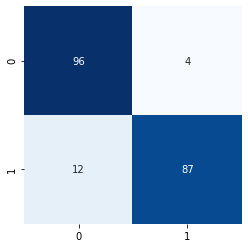

In [64]:
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False,)

In [65]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

print("The accuracy of the Gaussian Naive Bayes Model is {}".format(accuracy_score(y,y_pred)))
print("The f1_score of the Gaussian Naive Bayes Model is {}".format(f1_score(y,y_pred)))
print("The recall_score of the Gaussian Naive Bayes Model is {}".format(recall_score(y,y_pred)))
print("The precision_score of the Gaussian Naive Bayes Model is {}".format(precision_score(y,y_pred)))


The accuracy of the Gaussian Naive Bayes Model is 0.9195979899497487
The f1_score of the Gaussian Naive Bayes Model is 0.9157894736842106
The recall_score of the Gaussian Naive Bayes Model is 0.8787878787878788
The precision_score of the Gaussian Naive Bayes Model is 0.9560439560439561


#### Inference :

-   The model achives an accuracy of 91.95% with a recall of 87% and precision 95.6%.
-   The processing techniques help the model in learning better.
-   For numerical columns Gaussian Naive Bayes uses the Gaussian Probability Distribution function
-   For categorical columns NB uses the Bayes Theorem.

# Clustering

## Problem Statement : 
### Given the features of the players group them into categories on the basis of their batting performances.

In [66]:
df_new = df.copy()
df_new.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Year,Country,Not_out_HS
0,ML Hayden,11,10,1,659,158,73.22,652,101.07,3,1,0,69,18,2007,AUS,0
1,DPMD Jayawardene,11,11,2,548,115,60.88,644,85.09,1,4,0,40,10,2007,SL,1
2,RT Ponting,11,9,1,539,113,67.37,565,95.39,1,4,0,53,11,2007,AUS,0
3,SB Styris,10,9,3,499,111,83.16,598,83.44,1,4,0,45,6,2007,NZ,1
4,JH Kallis,10,9,3,485,128,80.83,578,83.91,1,3,0,43,7,2007,SA,1


##### For clustering we will be generting a new set of features from the exisiting features and use them for clustering the players

#### We will be clustering the batsman on the basis of only a certain number of features that truly reflect their batting style


Scaling and classifying batsman data
Firstly, I need to decide which metrics that we have defined are going to help us to group the batsman into their groups. I don't think any of the summary statistics are appropriate here, as we are trying to define the style in which the batsman performs, rather than the amount of runs that they happened to score in this tournament.

I have decided that I will work with just 3 groups in this example, which might not be the optimal grouping but I am working with only 50 players.

In [67]:
df_new['BoundaryRuns'] = df_new['4s'] * 4 + df_new['6s'] * 6
df_new['NonBoundaryRuns'] = df_new['Runs'] - df_new['BoundaryRuns']
df_new['TotalBoundaries'] = df_new['4s'] + df_new['6s']
df_new['NonBoundaryBalls'] = df_new['BF'] - df_new['TotalBoundaries']
df_new['RunsFromBoundary %'] = round(df_new['BoundaryRuns'] / df_new['Runs'] * 100, 2)
df_new['Boundary %'] = round(df_new['TotalBoundaries'] / df_new['BF'] * 100, 2)
df_new['NonBoundaryStrikeRate'] = round(df_new['NonBoundaryRuns'] / df_new['NonBoundaryBalls'] * 100, 2)
df_new['Boundary6 %'] = round(df_new['6s'] / (df_new['6s'] + df_new['4s']) * 100, 2)

In [68]:
grouping_columns = ['SR', 'RunsFromBoundary %', 'Boundary %', 'NonBoundaryStrikeRate', 'Boundary6 %']
df_chosen = df_new.loc[:,grouping_columns]

In [69]:
df_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_chosen))
df_scaled.columns = grouping_columns
df_scaled.head(3)

,SR,RunsFromBoundary %,Boundary %,NonBoundaryStrikeRate,Boundary6 %
0,0.530470,0.959293,0.736860,-0.173071,0.452499
1,-0.222428,-0.785240,-0.617165,0.507831,0.393389
2,0.262857,0.315202,0.249119,0.183493,0.152664


In [70]:
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



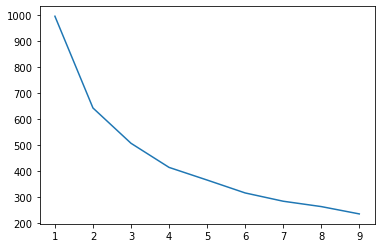

In [71]:
scores = []
clusters = [x for x in range(1,10)]
for i in clusters:
    kmeans = KMeans(i)
    model = kmeans.fit(df_scaled)
    scores.append(np.abs(model.score(df_scaled)))
    
plt.plot(clusters, scores)  
plt.show()

In [72]:
kmeans = KMeans(6)
model = kmeans.fit(df_scaled)
labels = model.predict(df_scaled)
df_8_clusters = df_new.copy()
labels_group = pd.Series(labels, dtype="category").map({0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H'})
df_8_clusters['Batting Classification'] = labels_group
df_8_clusters['Batting Labels'] = labels
fig = px.scatter(df_8_clusters, 
                 x='SR', 
                 y='RunsFromBoundary %', 
                 color='Batting Classification', 
                 hover_name='Player', 
                 size='Runs')
fig.update_layout(
    height=500,
    title_text='ICC Cricket World Cup - Batting Classifications'
)
fig.show()

In [73]:
fig = px.scatter(df_8_clusters, 
                 x='NonBoundaryStrikeRate', 
                 y='Boundary %', 
                 color='Batting Classification', 
                 hover_name='Player', 
                 size='Runs')
fig.update_layout(
    height=500,
    title_text='ICC Cricket World Cup - Batting Classifications'
)
fig.show()

### Inference:

The Elbow method shows that greater the number of clusters greater is the score but since we are restricted with the number of data points we chose a relatively small number of clusters to demonstrate the working of K-Means Algorithm.